```
    _   __                                  __           _   __         __                              __          
   / | / /  ___   __  __   _____  ____ _   / /          / | / /  ___   / /_ _      __  ____    _____   / /__   _____
  /  |/ /  / _ \ / / / /  / ___/ / __ `/  / /          /  |/ /  / _ \ / __/| | /| / / / __ \  / ___/  / //_/  / ___/
 / /|  /  /  __// /_/ /  / /    / /_/ /  / /          / /|  /  /  __// /_  | |/ |/ / / /_/ / / /     / ,<    (__  )
/_/ |_/   \___/ \__,_/  /_/     \__,_/  /_/          /_/ |_/   \___/ \__/  |__/|__/  \____/ /_/     /_/|_|  /____/  
                                                                                                                           
```                                                                           
## Intro to Neural Networks and PyTorch

What you will learn:
- What is a neural network
- Defining a neural network in numpy
- Intro to PyTorch
- Defining a neural network in PyTorch

---

What is a neural network?



A neural network is designed to mimic the human brain, it is comprised of a series of neurons and layers which deal with inputs and produces some output.


An example of a very basic neuron is as follows

![](https://cdn.rawgit.com/leoloman/intro-pytorch-nn/main/perceptron.svg)


This neuron has 2 inputs, $x_{1}$, $x_{2}$, which are fed into the weight layer, then this goes to a bias layer which is shown by the green layer, this is then followed by the activation function.

What occurs in the network at each step is as follows:

Red Layer:

$$
z_{1} = x_{1} * w_{1}
$$
$$
z_{2} = x_{2} * w_{2}
$$

Green Layer:

$$
v = z_{1} + z_{2} + b
$$

Orage layer - activation function

$$
y = f(v)
$$

The activation function is used to convert the unbounded input into a predictable form, a commonly used activation function is the sigmoid function. The sigmoid function only outputs numbers within the range of 0 - 1, large negative numbers become close to 0 and large positive numbers become close to 1.

Worked example:

$$
w = [0, 1]
$$
$$
b = 4
$$
$$
x = [2, 3]
$$

$$
(0 * 2) + (1 * 3) + 4 = 7
$$

$$
f(7) = 0.999
$$

The process of passing inputs through a neuron to get an output is known as a feedforward.

Now lets program this basic neural network


In [1]:
!pip install torch torchaudio torchvision torchtext torchdata transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.3 MB/s eta 0:00:00


In [2]:
import os
import numpy as np

In [3]:
def sigmoid(x):
  """Activation function
      f(x) = 1 / (1 + e^-x)
  """
  return 1 / (1 + np.exp(-x))


class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

In [4]:
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)

x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


A neural network is a combination of multiple neurons connected together.

Here is a simple neural network:
![](https://cdn.rawgit.com/leoloman/intro-pytorch-nn/main/network.svg)

This network has 2 inputs, a hidden layer with 2 neurons and an output layer with a single neuron.

Lets take a worked example with the network, lets assume all neurons have the same weights and bias and the same sigmoid activation function.

$$
w = [0,1]
$$
$$
b = 0
$$

$$
h_{1} = h_{2} = f(w \cdot x +b)
$$

$$
f((0 * 2) + (1*3) + 0) = 0.9526
$$

$$
o_{1} = f(w \cdot [h_{1}, h_{2}] + b)
$$

$$
f(( 0 *0.9526) + ( 1 * 0.9526) + 0)
$$

$$
f(0.9526) = 0.7216
$$


In [5]:
class NeuralNetwork:
  """
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  Each neuron has the same weights and bias:
    - w = [0,1]
    - b = 0
  """

  def __init__(self):
    weights = np.array([0,1])
    bias = 0

    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))


0.7216325609518421


Training a neural network

In [6]:
data_to_train = {'name': ['Alice', 'Bob', 'Charlie', 'Diana'],
                 'weight': [133, 160, 152, 120],
                 'height':[65, 72, 70, 60],
                 'sex' : ['F', 'M', 'M', 'F']}

In [7]:
data_to_train['weight'] = [(x - np.mean(data_to_train['weight']))/np.std(data_to_train['weight']) for x in data_to_train['weight']]
data_to_train['height'] = [(x - np.mean(data_to_train['height']))/np.std(data_to_train['height']) for x in data_to_train['height']]
data_to_train['sex'] = [1 if x == 'F' else 0 for x in data_to_train['sex']]

Training a neural network

When training a neural network you can decide to use various metrics to define how well your neural network fits to data, this is defined as Loss.

In this case we will use the Mean Squared Error to fit the neural network to data

The mean squared error is defined as

$$
MSE = \frac{1}{n} \sum(y_{true} - y_{pred})^2
$$

Where broken down:
- $n$ is the number of samples in your data
- $y$ represents an observed value
- $y_{true}$ is your observed data
- $y_{pred}$ is your neural networks predicted value

$(y_{true} - y_{pred})^2$ is the squared error between the observed and predicted value, then you simply take the mean of all of these.

In [8]:
def mse(y_true, y_pred):
  """
  Mean squared error
  """
  return np.mean(np.power(y_true - y_pred, 2))

The loss function can be written as a muli-variable function:

$$
L(w_{1}, w_{2}, w_{3}, w_{4}, w_{5}, w_{6}, b_{1}, b_{2}, b_{3})
$$

Now imagine we want to tweak $w_{1}$, how would the Loss change if we changed $w_{1}$? The partial derivative $\frac{\partial L}{\partial w_{1}}$ can answer.

To start we will write the partial derivative in terms of $\frac{\partial y_{pred}}{\partial w_{1}}$ instead:

$$
\frac{\partial L}{\partial w_{1}} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial w_{1}}
$$

We can calculate $\frac{\partial L}{\partial y_{pred}}$  as $L = \sum(y_{true} - y_{pred})^2$
$$
\frac{\partial L}{\partial y_{pred}} = \frac{\partial (y_{true} - y_{pred})^2}{\partial y_{pred}} = -2(y_{true} - y_{pred})
$$

Now we need to break down

$$
\frac{\partial y_{pred}}{\partial w_{1}}
$$

Now $h_{1}, h_{2}, o_{1}$ will represent their neurons then

$$
y_{pred} = o_{1} = f(w_{5} h_{1} + w_{6} h_{2} +b_{3})
$$

Where $f$ is the sigmoid activation function.

Since $w_{1}$ only affects $h_{1}$ not $h_{2}$, we can write.

$$
\frac{\partial y_{pred}}{\partial w_{1}} = \frac{\partial y_{pred}}{\partial h_{1}} * \frac{\partial h_{1}}{\partial w_{1}}
$$

$$
\frac{\partial y_{pred}}{\partial h_{1}} = w_{5} * f'(w_{5} h_{1} + w_{6} h_{2} + b_{3})
$$

Then we will do the same thing for $\frac{\partial h_{1}}{\partial w_{1}}$:

$$
h_{1} = f(w_{1} x_{1} + w_{2} x_{2} + b_{1})
$$

$$
\frac{\partial h_{1}}{\partial w_{1}} = x_{1} * f'(w_{1} x_{1} + w_{2} x_{2} + b_{1})
$$

Where $x_{1}$ is the weight and $x_{2}$ is the height. Included in the above equations is $f'$ which is the derivative of the sigmoid function:

$$
f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}
$$

Now $\frac{\partial L}{\partial w_{1}}$ has been broken down into several manageable parts which can be calculated.

$$
\frac{\partial L}{\partial w_{1}} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial h_{1}} * \frac{\partial h_{1}}{\partial w_{1}}
$$

Keep in mind this was just for altering $w_{1}$ but the process would be similar for the subsequent values. The system for calculating these partial derivatives by working backwards is known as backpropagation or 'backprop'.

Training: Stochastic Gradient Descent

In the following example we will use a method of training called 'Stochastic Gradient Descent' but there are many different ways of training neural networks. SGD tells us how to change the weights and bias to minimize the loss. There is the following update equation:

$$
w_{1} \leftarrow w_{1} - \eta \frac{\partial L}{\partial w_{1}}
$$

$\eta$ is a constant value called the learning rate which controls how fast the model can be trained. The above term is subtracted from $w_{1}$, if the above term is positive  then $w_{1}$ will decrease which will make $L$ decrease. If negative then $w_{1}$ will increase and so will $L$.


The training process is as follows:
1. Choose a sample from the dataset.
2. Calculate all the partial derivatives of loss with respect to weight or bias
3. Use the update equation to update the weight or bias
4. Go back to step 1 until either convergence or a set number of epochs has been met.

In [9]:
def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

class NeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    self.loss = []

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)

        loss = mse(all_y_trues, y_preds)
        if epoch % 100 == 0:
          print("Epoch %d loss: %.3f" % (epoch, loss))
        self.loss.append([epoch, loss])

# prompt: can you reshape data_to_train into a matrix, can you use base python

data_matrix = []
for i in range(len(data_to_train['name'])):
  row = np.array([data_to_train['weight'][i], data_to_train['height'][i]])
  data_matrix.append(row)

# Define dataset
data = np.array(data_matrix)
all_y_trues = np.array(data_to_train['sex'])


# Train our neural network!
network = NeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.345
Epoch 100 loss: 0.080
Epoch 200 loss: 0.029
Epoch 300 loss: 0.015
Epoch 400 loss: 0.010
Epoch 500 loss: 0.007
Epoch 600 loss: 0.006
Epoch 700 loss: 0.005
Epoch 800 loss: 0.004
Epoch 900 loss: 0.003


In [10]:
import matplotlib.pyplot as plt

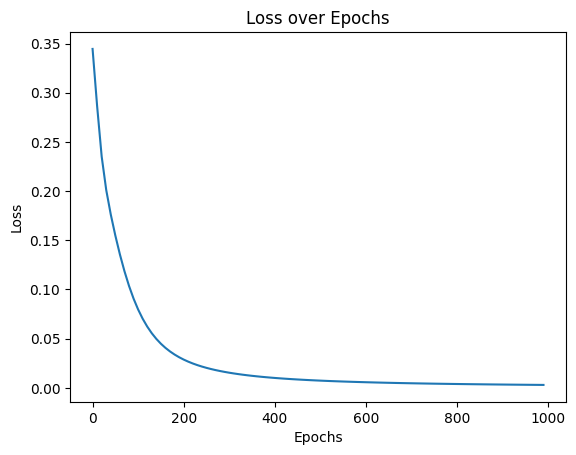

In [11]:
plt.plot([x[0] for x in network.loss], [x[1] for x in network.loss])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [12]:
# Make some predictions
jessica = np.array([-7, -3]) # 128 pounds, 63 inches
adam = np.array([20, 2])  # 155 pounds, 68 inches
print("Jessica: %.3f" % network.feedforward(jessica)) # F
print("Adam: %.3f" % network.feedforward(adam)) # M

Jessica: 0.956
Adam: 0.031


# PyTorch

PyTorch has become the industry standard package for developing and loading and running inference with neural networks / large language models


https://pytorch.org/

In [13]:
!nvidia-smi

Tue Oct 15 18:15:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [14]:
import torch
import math
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

PyTorch allows the user to use different devices:
- "cuda" - Nvidia GPU
- "mps" - Apple Metal Performance Shaders (m series macs)
- "cpu"

In [15]:
device = (
    "cuda"
    if torch.cuda.is_available() # this checks whether a gpu is available
    else "mps"
    if torch.backends.mps.is_available() # this is for apple m1 chips
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


<details>
  <summary>What is a tensor?</summary>

  A tensor is a multi dimension matrix consisting of a single data type

</details>

In [16]:
x = torch.tensor([[1]])

x.item()

1

Torch objects can be moved between devices ie cpu -> gpu with the following

In [20]:
x.to('cuda')

tensor([[1]], device='cuda:0')

In [24]:
x = torch.tensor([[1], [2]], device = 'cpu')

See more on indexing, slicing, joining and mutating here: https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining


A tensor can be created with `requires_grad=True` so that torch.autograd records operations on them for automatic differentiation.

In [ ]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
out = x.pow(2).sum()
out.backward()
x.grad

# Implementing a basic neural network in pytorch

In [16]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# the above model can be moved to the gpu as well - in your own time have a go at moving the model to gpu and running the training loop on gpu
# hint: use the .to() to move the object to the gpu

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 265.8453674316406
199 179.88084411621094
299 122.7143325805664
399 84.68437957763672
499 59.37547302246094
599 42.52561569213867
699 31.30276107788086
799 23.824373245239258
899 18.838787078857422
999 15.513387680053711
1099 13.294169425964355
1199 11.81234073638916
1299 10.822325706481934
1399 10.160476684570312
1499 9.71776008605957
1599 9.421399116516113
1699 9.22288703918457
1799 9.089813232421875
1899 9.000540733337402
1999 8.940607070922852
Result: y = -0.006111369468271732 + 0.8475133776664734 x + 0.0010543126845732331 x^2 + -0.09201786667108536 x^3


---
# Loading Large Language Model onto GPU

In [26]:
from transformers import AutoTokenizer, AutoModelForCausalLM#,BitsAndBytesConfig
import transformers

In [27]:
!pip install git+https://github.com/bitsandbytes-foundation/bitsandbytes

  Cloning https://github.com/bitsandbytes-foundation/bitsandbytes to /tmp/pip-req-build-h_5dyogd
  Running command git clone --filter=blob:none --quiet https://github.com/bitsandbytes-foundation/bitsandbytes /tmp/pip-req-build-h_5dyogd
  Resolved https://github.com/bitsandbytes-foundation/bitsandbytes to commit 2da2f1945ce5567e27d45df43acd4f65108d5c25
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bitsandbytes: filename=bitsandbytes-0.44.2.dev0-cp310-cp310-linux_x86_64.whl size=122184 sha256=63369dc8d981a8381ca1bf89e6df936a6600bd5ef71c6816ba633e377da14401
  Stored in directory: /tmp/pip-ephem-wheel-cache-h673e4oj/wheels/f6/a1/ce/ae239133861255c885168d37da6ea2885ae355f7e1f7533c63
Successfully built bitsandbytes


# What is a large language model?

A large language model is a predictive text neural network,

Text is processed with a tokenizer first

The tokens are then passed into the model where they are converted to their numerical representation and then final layer of the neural network applies some activation function.

With general large language models the final layer is predicting the next series of tokens.

First we will observe what occurs when text is tokenized

In [29]:
# first we load the tokenizer
model = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [30]:
tokenizer.tokenize("Explain to me the difference between nuclear fission and fusion.")

['Expl',
 'ain',
 'Ġto',
 'Ġme',
 'Ġthe',
 'Ġdifference',
 'Ġbetween',
 'Ġnuclear',
 'Ġf',
 'ission',
 'Ġand',
 'Ġfusion',
 '.']

Have a go at tokenizing different text with different kinds of words - what do you observe?


Now we will load the full model onto the gpu

In [31]:
falcon_pipeline = transformers.pipeline("text-generation",
                                        model=model,
                                        tokenizer=tokenizer,
                                        torch_dtype=torch.bfloat16,
                                        trust_remote_code=True,
                                        device_map="auto"
                                        )

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

In [32]:
!nvidia-smi

Tue Oct 15 18:26:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              30W /  70W |  13969MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [24]:

def get_completion_falcon(input):
  system = f"""
  You are an expert Physicist.
  You are good at explaining Physics concepts in simple words.
  Help as much as you can.
  """
  prompt = f"#### System: {system}\n#### User: \n{input}\n\n#### Response from falcon-7b-instruct:"
  print(prompt)
  falcon_response = falcon_pipeline(prompt,
                                    max_length=500,
                                    do_sample=True,
                                    top_k=10,
                                    num_return_sequences=1,
                                    eos_token_id=tokenizer.eos_token_id,
                                    )
  return falcon_response

In [25]:
prompt = "Explain to me the difference between nuclear fission and fusion."
response = get_completion_falcon(prompt)
print(response[0]['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


#### System: 
  You are an expert Physicist.
  You are good at explaining Physics concepts in simple words.
  Help as much as you can.
  
#### User: 
Explain to me the difference between nuclear fission and fusion.

#### Response from falcon-7b-instruct:
#### System: 
  You are an expert Physicist.
  You are good at explaining Physics concepts in simple words.
  Help as much as you can.
  
#### User: 
Explain to me the difference between nuclear fission and fusion.

#### Response from falcon-7b-instruct:
#### Answer:

The main difference between nuclear fission and fusion is the type of nuclear reaction they produce. In nuclear fission, an unstable, heavy nucleus splits into two or more smaller nuclei and releases a significant amount of energy in the form of gamma radiation and free neutrals. On the other hand, fusion is a nuclear reaction in which two lighter nuclei combine to form a heavier nucleus, releasing a substantial amount of energy in the process. Fusion releases energy due 

Large language models can be quantised to fit onto smaller gpus - what this means is that the precision of the floating points is reduced. The effect that this has can vary per model.


PyTorch Tutorial Page:
https://pytorch.org/tutorials/beginner/basics/intro.html

Coding a gpt style model with pytorch:
https://colab.research.google.com/drive/1JMLa53HDuA-i7ZBmqV7ZnA3c_fvtXnx-?usp=sharing


Things to potentially read up on:

https://github.com/triton-inference-server/server
https://developer.nvidia.com/triton-inference-server

Deep Speed:
https://www.deepspeed.ai/

https://colab.research.google.com/drive/1KfOIIS6BYPMxtEM1YMudblB2JSQKUMy_?usp=sharing
https://github.com/stas00/porting/blob/master/transformers/deepspeed/DeepSpeed_on_colab_CLI.ipynb